In [78]:
import pandas as pd
# Navigate to the file location
file_path = '/content/PRSA_Data_Dingling.csv'

# Load the CSV file
df = pd.read_csv(file_path)

In [79]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [80]:
# Get an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [81]:
# Summary statistics for numeric columns
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [82]:
# Shape of the dataset (rows, columns)
df.shape

(35064, 18)

In [83]:
# Column names
df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [84]:
# Check for missing values
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


In [85]:
# Replace missing values for numerical features with mean/median
numerical_features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']
for feature in numerical_features:
    df[feature] = df[feature].fillna(df[feature].mean())  # Replace with median if needed

# Replace missing values for rainfall with zero or median
df['RAIN'] = df['RAIN'].fillna(0)

# Replace missing values for categorical features with mode
categorical_features = ['wd']
for feature in categorical_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])


In [86]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [87]:
# Confirm no missing values
assert df.isnull().sum().sum() == 0, "There are still missing values!"

# Check for duplicates
df = df.drop_duplicates()


In [88]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,27.585467,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,27.585467,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.000000,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,27.585467,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,27.585467,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [89]:
# Value counts for categorical variables
df['wd'].value_counts()

,count
wd,
NNW,4916
NW,3838
N,3777
WNW,2877
ESE,2786
E,2427
NNE,1919
SSE,1853
SE,1823


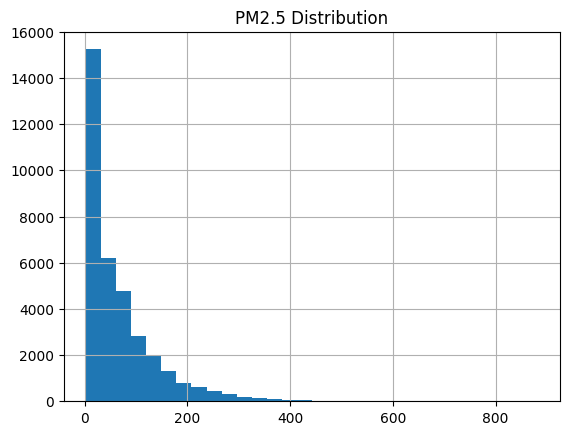

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical columns
df['PM2.5'].hist(bins=30)
plt.title('PM2.5 Distribution')
plt.show()

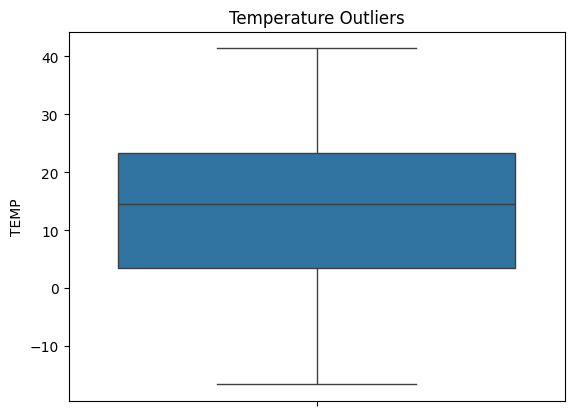

In [91]:
# Box plot for detecting outliers
sns.boxplot(df['TEMP'])
plt.title('Temperature Outliers')
plt.show()

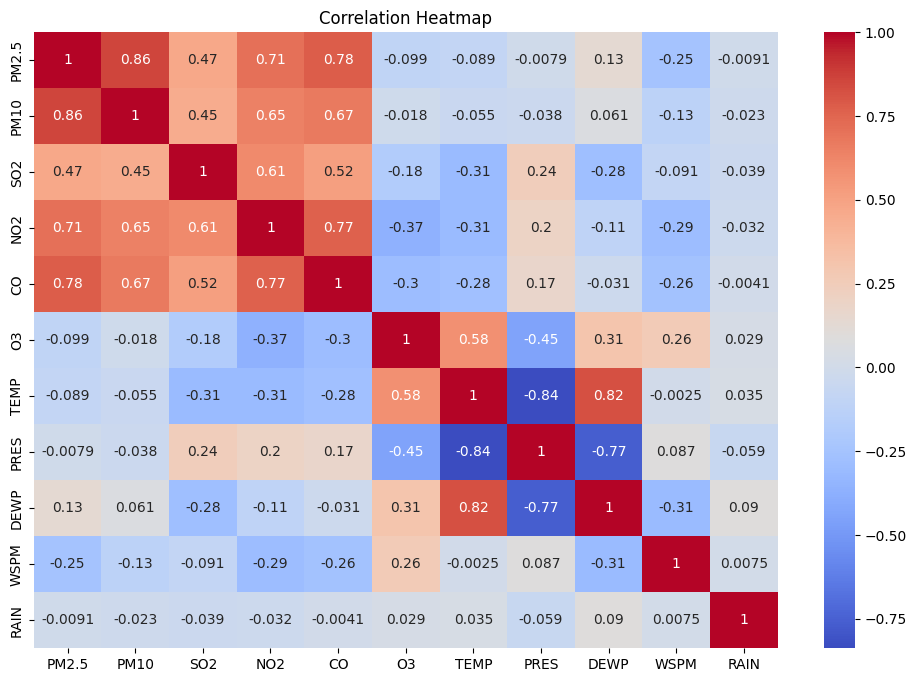

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
numerical_features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM', 'RAIN']

sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()


In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'WSPM']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [94]:
df = pd.get_dummies(df, columns=['wd'], drop_first=True)


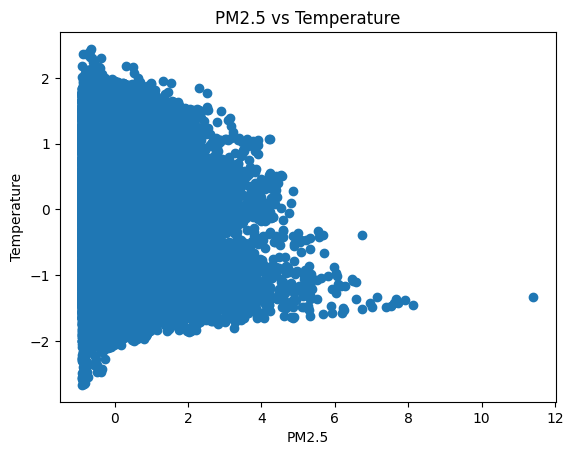

In [95]:
plt.scatter(df['PM2.5'], df['TEMP'])
plt.xlabel('PM2.5')
plt.ylabel('Temperature')
plt.title('PM2.5 vs Temperature')
plt.show()


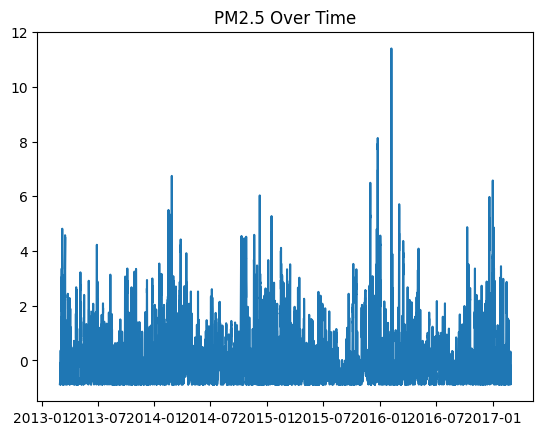

In [96]:
df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
plt.plot(df['timestamp'], df['PM2.5'])
plt.title('PM2.5 Over Time')
plt.show()

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X = df.drop('PM2.5', axis=1)
y = df['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Assuming 'df' is your DataFrame
# Drop the 'timestamp', 'station' column and the target column from X
X = df.drop(['PM2.5', 'timestamp', 'station'], axis=1)
y = df['PM2.5']

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Rest of your code for feature importance etc.
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

In [99]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
from sklearn.metrics import mean_squared_error, r2_score

# Model predictions for regression task
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.1355486431407376


In [101]:
# Calculate R² score (good metric for regression tasks)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

R² Score: 0.8612332376737416


In [102]:
df.to_csv('processed_data.csv', index=False)